4.3.a
{'MILLION': 0.002072759168154815, 'MORE': 0.0017088989966186725, 'MR.': 0.0014416083492816956, 'MOST': 0.0007879173033190295, 'MARKET': 0.0007803712804681068, 'MAY': 0.0007298973156289532, 'M.': 0.0007034067394618568, 'MANY': 0.0006967290595970209, 'MADE': 0.0005598610827336895, 'MUCH': 0.0005145971758110562, 'MAKE': 0.0005144626437991272, 'MONTH': 0.00044490959363187093, 'MONEY': 0.00043710673693999306, 'MONTHS': 0.0004057607781605526, 'MY': 0.0004003183467688823, 'MONDAY': 0.00038198530259784006, 'MAJOR': 0.00037089252670515475, 'MILITARY': 0.00035204581485220204, 'MEMBERS': 0.00033606096579846475, 'MIGHT': 0.00027358919153183117, 'MEETING': 0.0002657374141083427, 'MUST': 0.0002665079156312084, 'ME': 0.00026357267173457725, 'MARCH': 0.0002597935452176646, 'MAN': 0.0002528834918776787, 'MS.': 0.0002389900041002911, 'MINISTER': 0.00023977273580605944, 'MAKING': 0.00021170446604452378, 'MOVE': 0.0002099555498894477, 'MILES': 0.00020596851026319035}
4.3.b
[('<UNK>', 0.6150198100055

<ipython-input-1-34c698bd51c1>:68: RuntimeWarning: divide by zero encountered in log
  return np.log(bi)


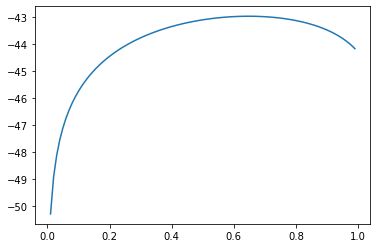

Optimal Lambda is 0.64
4.4.a
[a1, a2, a3] = [[0.95067228 0.01560333 0.03189472]]
4.4.b
mse 2000: 117.9083331254247
mse 2001: 54.6360532458946


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    word = []
    uni = []
    bi = {}
    word_path = "hw4_vocab.txt"
    uni_path = "hw4_unigram.txt"
    bi_path = "hw4_bigram.txt"
    with open(word_path, "r") as w, \
            open(uni_path, "r") as u, \
            open(bi_path, "r") as b:
        for line in w.readlines():
            line = line.split("\n")
            word.append(line[0])
        for line in u.readlines():
            line = line.split("\n")
            uni.append(int(line[0]))
        for line in b.readlines():
            line = line.strip().split("\t")
            tup = (int(line[0]) - 1, int(line[1]) - 1)
            bi[tup] = int(line[2])
        return word, uni, bi


words, unigram, bigram = load_data()
total_words = 0
for count in unigram:
    total_words += count


# Part A MLE
def unigram_mle(word):
    return unigram[word] / total_words


# Part B MLE
def bigram_mle(prev, curr):
    if (prev, curr) not in bigram.keys():
        return 0
    return bigram[(prev, curr)] / unigram[prev]


def unigram_prob(sentence):
    sentence = sentence.split(" ")
    for i in range(len(sentence)):
        if sentence[i] not in words:
            sentence[i] = "<UNK>"
    uni = 1
    for i in range(1, len(sentence) - 1):
        uni *= unigram_mle(words.index(sentence[i]))
    return np.log(uni)


def bigram_prob(sentence):
    sentence = sentence.split(" ")
    for i in range(len(sentence)):
        if sentence[i] not in words:
            sentence[i] = "<UNK>"
    bi = 1
    for i in range(1, len(sentence) - 1):
        prob = bigram_mle(words.index(sentence[i - 1]), words.index(sentence[i]))
        if prob == 0:
            print("Not observed: " + sentence[i - 1] + " " + sentence[i])
        bi *= prob
    return np.log(bi)


def mix_mle(lam, prev, curr):
    return lam * unigram_mle(curr) + (1 - lam) * bigram_mle(prev, curr)


def mix_prob(lam, sentence):
    sentence = sentence.split(" ")
    for i in range(len(sentence)):
        if sentence[i] not in words:
            sentence[i] = "<UNK>"
    mix = 1
    for i in range(1, len(sentence) - 1):
        mix *= mix_mle(lam, words.index(sentence[i - 1]), words.index(sentence[i]))
    return np.log(mix)


def plot(sentence):
    lambda_range = np.linspace(0.01, 0.99, 100)
    mixture = []
    dic = {}
    for i in range(len(lambda_range)):
        mixture.append(mix_prob(lambda_range[i], sentence))
        dic[lambda_range[i]] = mixture[i]
    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    plt.plot(lambda_range, mixture)
    plt.show()
    return dic


def main():
    # 4.3.a
    print("4.3.a")
    part_a = {}
    for i in range(len(words)):
        if words[i][0].upper() == 'M':
            part_a[words[i]] = unigram[i] / total_words
    print(part_a)

    # 4.3.b
    print("4.3.b")
    part_b = {}
    k = words.index("THE")
    for key in bigram.keys():
        if key[0] == k:
            part_b[words[key[1]]] = bigram_mle(key[0], key[1])
    part_b_sorted = sorted(part_b.items(), key=lambda x: x[1], reverse=True)[:10]
    print(part_b_sorted)

    # 4.3.c
    print("4.3.c")
    sentence_c = "<s> THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK </s>"
    print("Unigram: ", unigram_prob(sentence_c))
    print("Bigram: ", bigram_prob(sentence_c))

    # 4.3.d
    print("4.3.d")
    sentence_d = "<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE </s>"
    print("Unigram: ", unigram_prob(sentence_d))
    print("Bigram: ", bigram_prob(sentence_d))
    # This makes the log likelihood becomes negative infinity

    # 4.3.e
    print("4.3.e")
    best = plot(sentence_d)[0][0]
    best = round(best, 2)
    print(f"Optimal Lambda is {best}")

    # 4.4.a
    nas0 = []
    nas1 = []
    with open("nasdaq00.txt", "r") as n0, \
            open("nasdaq01.txt", "r") as n1:
        for line in n0.readlines():
            nas0.append(float(line[:-1]))
        for line in n1.readlines():
            nas1.append(float(line[:-1]))
    A = np.zeros((3, 3))
    b = np.zeros((3, 1))
    for i in range(len(nas0) - 3):
        xt = np.array([nas0[i], nas0[i + 1], nas0[i + 2]]).reshape((3, 1))
        A = A + np.dot(xt, xt.T)
        yt = nas0[i + 3]
        b += yt * xt
    coef = np.flip(np.dot(np.linalg.inv(A), b)).reshape((1, 3))
    print("4.4.a")
    print("[a1, a2, a3] = " + str(coef))

    # 4.4.b
    valid0 = np.array(nas0[3:])
    valid1 = np.array(nas1[3:])
    test0 = []
    test1 = []
    for i in range(len(nas0) - 3):
        prev = np.array([nas0[i + 2], nas0[i + 1], nas0[i]]).reshape((3, 1))
        test0.append((np.dot(coef, prev))[0][0])
    for i in range(len(nas1) - 3):
        prev = np.array([nas1[i + 2], nas1[i + 1], nas1[i]]).reshape((3, 1))
        test1.append((np.dot(coef, prev))[0][0])
    test0 = np.array(test0)
    test1 = np.array(test1)

    mse0 = np.sqrt(np.mean(((test0 - valid0) ** 2)))
    mse1 = np.sqrt(np.mean(((test1 - valid1) ** 2)))

    # lower MSE does not justify that the model works better in 2001,
    # it only demonstrates that the linear regression preserves through 2001
    print("4.4.b")
    print(f"mse 2000: {mse0}")
    print(f"mse 2001: {mse1}")


if __name__ == '__main__':
    main()
